- **Heart Disease Prediction using Neural Networks**
- Machine Learning,CH05 Deep Learning Final Assignment for peer review (Wang Xu finish at 2022.3.25)
---

## Main Objective
This project will focus on predicting heart disease using neural networks of deep learning.\
After a few steps of changing different parameters and data transformation I applied (learned from this chapter), model success (accuracy) increased. The important thing here is the need to do these steps.\
Also, Random forest algorithm will be used as a baseline performance with comparison.

## Brief Description of Dataset

Based on attributes such as blood pressure, cholestoral levels, heart rate, and other characteristic attributes, patients will be classified according to varying degrees of coronary artery disease. \
This project will utilize a dataset of **303 patients** and distributed by the *UCI Machine Learning Repository*.\
http://archive.ics.uci.edu/ml/datasets/Heart+Disease \
We will be using some common Python libraries, such as pandas, numpy, and matplotlib. Furthermore, for the machine learning side of this project, we will be using sklearn and keras. 

**14 Attributes description:**

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy (for classification of vessels)
13. thal: results of nuclear stress test (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. num: **target variable** representing diagnosis of heart disease (angiographic disease status) in any major vessel
- Value 0: < 50% diameter narrowing
- Value 1,2,3,4: > 50% diameter narrowing

## Import libraries and dataset

In [99]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score

In [100]:
cleveland = pd.read_csv("data/processed_cleveland.csv")

In [101]:
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


## Data wrangling


### Summary - Actions taken for cleaning:
- check missing value and invalid value
- dtypes changed to int/float 
- find a "?" in loc166 & 3 NaN values, replace it with '0'
- add target column which is binary, num stays target category


In [102]:
data = cleveland.copy()
#data = data.apply(pd.to_numeric)
#data.dtypes

In [103]:
data = data[~data.isin(["?"])]

In [104]:
data = data.fillna(0)

In [105]:
data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

In [106]:
data['target']=data['num'].replace({0:0,2:1,3:1,4:1})

In [107]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
198,50,0,2,120,244,0,0,162,0,1.1,1,0,3,0,0
182,42,1,1,148,244,0,2,178,0,0.8,1,2,3,0,0
73,65,1,4,110,248,0,2,158,0,0.6,1,2,6,1,1
232,49,1,3,118,149,0,2,126,0,0.8,1,3,3,1,1
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1,1


In [108]:
data.target.value_counts() #binary target

0    164
1    139
Name: target, dtype: int64

In [109]:
data.num.value_counts() #categorical target

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

## EDA

### Features distribution

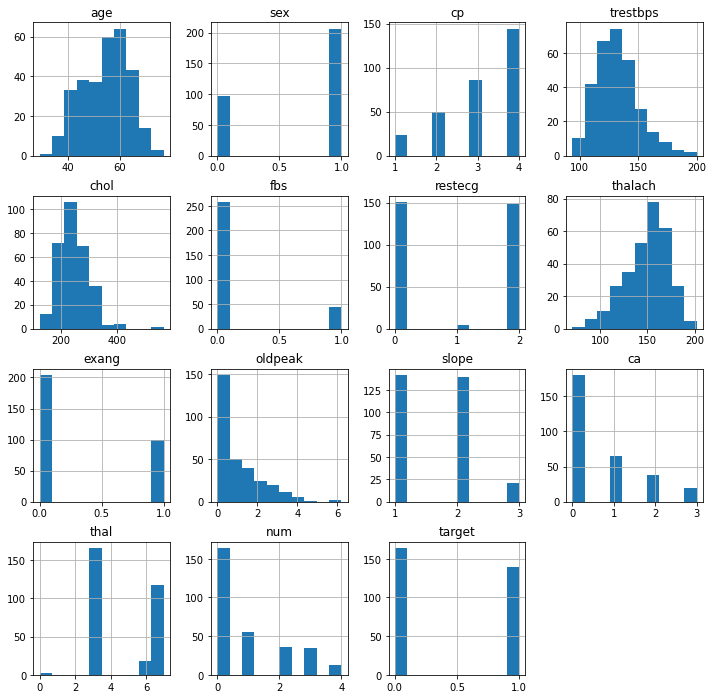

In [12]:
data.hist(figsize=(12,12))
plt.show()

### Features correlations

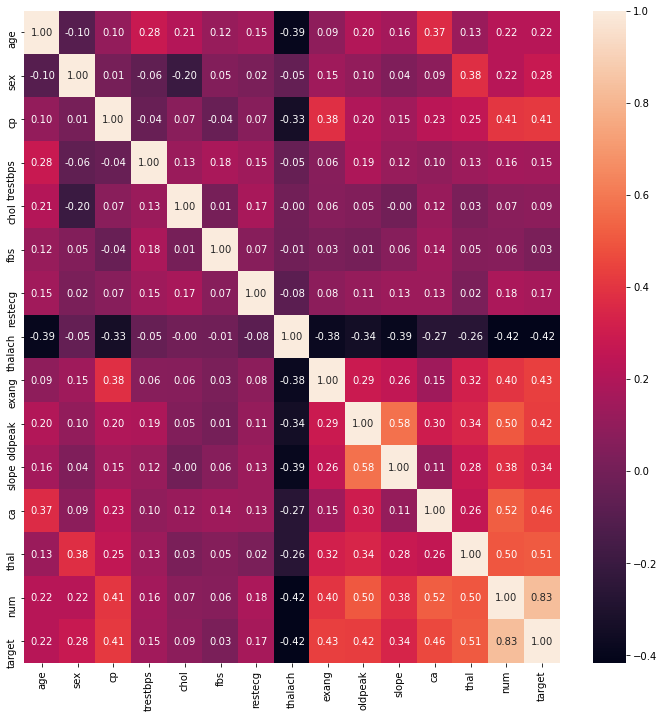

In [158]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

### Distribution between target and age

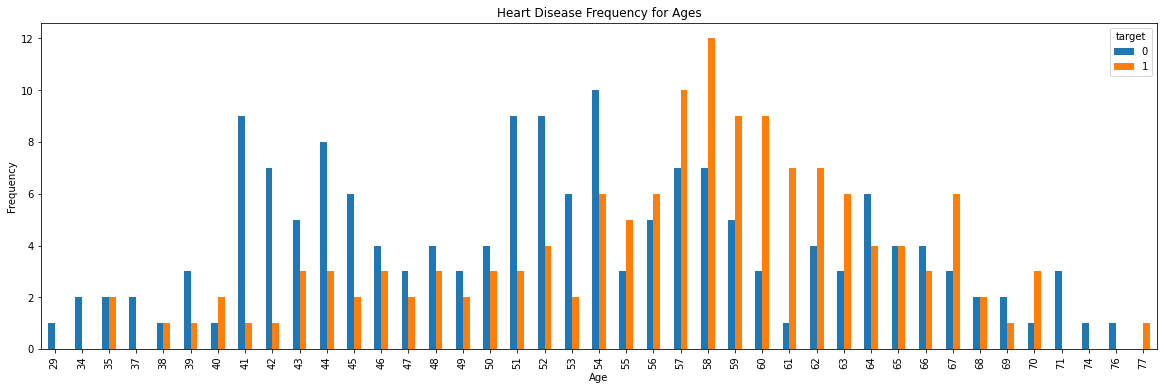

In [14]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Split train and test set

In [117]:
X = data.iloc[:,:-2].values
Y_binary =data.target.values

In [118]:
X_train,X_test, y_train, y_test = train_test_split(X,
                                                   Y_binary,stratify=Y_binary,
                                                   random_state=111,
                                                   test_size=0.2)

## Baseline performance - using Random Forest : rf_model

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [121]:
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.852
roc-auc is 0.927


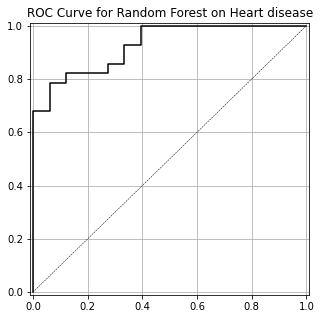

In [122]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Heart disease'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
plot_roc(y_test, y_pred_prob_rf[:, 1], 'Random Forest')

## Building Neural Networks : model_1 (categorical)

### StandardScale

In [123]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [124]:
X_train_norm[1]

array([ 1.50087888,  0.67663234,  0.89319609,  0.71769354, -0.98089174,
        2.47338777, -1.00210716, -0.39905973, -0.68313005,  2.01841585,
        0.66424335,  1.429883  ,  1.22133514])

In [125]:
y_train[1]

1

In [126]:
# convert the (target)data to categorical labels
from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=None)
y_test_cat = to_categorical(y_test, num_classes=None)
print (y_train_cat.shape)
print (y_train_cat[:10])

(242, 2)
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


### layers building
- using Dropout
- l2 regularizers (lr=0.001)
- activation ='softmax'
- loss function: categorical_crossentropy
- optimizer: rmsprop

In [127]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras import regularizers

In [128]:
model_1 = Sequential()
model_1.add(Dense(16, input_shape=(13,),
                  kernel_initializer='normal', 
                  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(8, kernel_initializer='normal', 
                  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(2,activation='softmax'))

In [129]:
model_1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                224       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dropout_17 (Dropout)        (None, 8)                 0         
                                                                 
 dense_26 (Dense)            (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [130]:
history_1 = model_1.fit(X_train_norm,y_train_cat,
                        validation_data=(X_test_norm,y_test_cat),epochs=50,batch_size=10)

Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 0.6724 - accuracy: 0.7107 - val_loss: 0.6373 - val_accuracy: 0.8689
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6348 - accuracy: 0.7645 - val_loss: 0.5776 - val_accuracy: 0.8689
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5809 - accuracy: 0.8223 - val_loss: 0.5211 - val_accuracy: 0.8852
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5443 - accuracy: 0.8182 - val_loss: 0.4667 - val_accuracy: 0.9016
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.8388 - val_loss: 0.4174 - val_accuracy: 0.9016
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4659 - accuracy: 0.8388 - val_loss: 0.3848 - val_accuracy: 0.9016
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4353 - accuracy: 0.8430 - val_loss: 0.3550 - val_accuracy: 0.9016
Epoch 8/50
25/25 [=

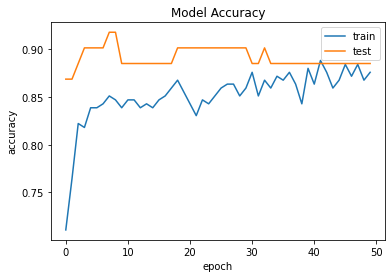

In [131]:
# Model accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

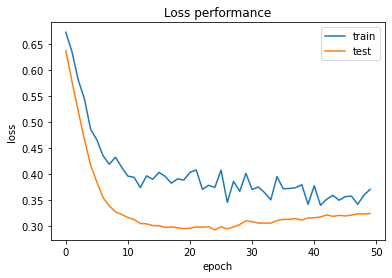

In [132]:
# loss perfomance
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Loss performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

**val_accuracy in last epoch is 0.90, which is pretty high. Let's try more parameters whether has space to improve.**

## Try different parameters : model_2
- l2 regularizers (lr=0.001)
- activation:sigmoid
- loss function: binary_crossentropy
- optimizer: Adam(lr=0.001)

In [133]:
model_2=Sequential()
model_2.add(Dense(16,input_shape=(13,),kernel_initializer='normal', 
                  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(8,kernel_initializer='normal', 
                  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(1,activation='sigmoid'))

In [134]:
model_2.compile(Adam(lr = .001),loss='binary_crossentropy',metrics=['accuracy'])

In [135]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                224       
                                                                 
 dropout_18 (Dropout)        (None, 16)                0         
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dropout_19 (Dropout)        (None, 8)                 0         
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [136]:
history_2 = model_2.fit(X_train_norm,y_train,validation_data=(X_test_norm,y_test),epochs=50,batch_size=10)

Epoch 1/50
25/25 [==============================] - 1s 7ms/step - loss: 0.6885 - accuracy: 0.6116 - val_loss: 0.6788 - val_accuracy: 0.7541
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.7438 - val_loss: 0.6488 - val_accuracy: 0.7869
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6444 - accuracy: 0.7727 - val_loss: 0.5921 - val_accuracy: 0.8361
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5985 - accuracy: 0.7810 - val_loss: 0.5346 - val_accuracy: 0.8197
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5712 - accuracy: 0.8140 - val_loss: 0.4933 - val_accuracy: 0.8525
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5326 - accuracy: 0.8140 - val_loss: 0.4465 - val_accuracy: 0.8852
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.4953 - accuracy: 0.8430 - val_loss: 0.4145 - val_accuracy: 0.8852
Epoch 8/50
25/25 [==

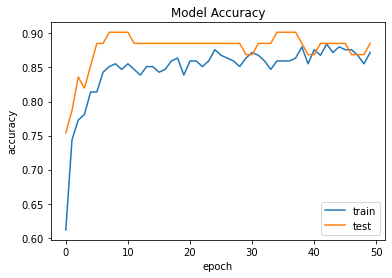

In [137]:
# Model accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

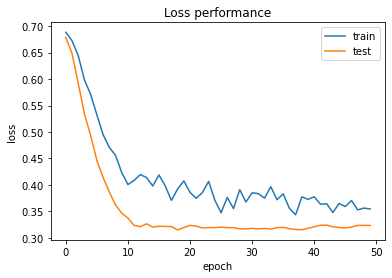

In [138]:
# loss perfomance
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Loss performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Try more : model_3

- l2 regularization (lr=0.001)
- more units in input layer
- activation : sigmoid
- optimizer: Adam(lr=0.002)
- loss function:binary_crossentropy

In [139]:
model_3=Sequential()
model_3.add(Dense(36, input_shape=(13,),kernel_initializer='normal', 
                  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(10,kernel_initializer='normal', 
                  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(1,activation='sigmoid'))
model_3.compile(Adam(lr = .002),loss='binary_crossentropy',metrics=['accuracy'])

In [140]:
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 36)                504       
                                                                 
 dropout_20 (Dropout)        (None, 36)                0         
                                                                 
 dense_31 (Dense)            (None, 10)                370       
                                                                 
 dropout_21 (Dropout)        (None, 10)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 885
Trainable params: 885
Non-trainable params: 0
_________________________________________________________________


In [141]:
history_3 = model_3.fit(X_train_norm,y_train,validation_data=(X_test_norm,y_test),epochs=20,batch_size=10)

Epoch 1/20
25/25 [==============================] - 1s 8ms/step - loss: 0.6796 - accuracy: 0.6860 - val_loss: 0.6416 - val_accuracy: 0.8361
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6024 - accuracy: 0.7934 - val_loss: 0.5078 - val_accuracy: 0.8852
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4737 - accuracy: 0.8264 - val_loss: 0.3772 - val_accuracy: 0.9016
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4278 - accuracy: 0.8388 - val_loss: 0.3251 - val_accuracy: 0.9016
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4077 - accuracy: 0.8430 - val_loss: 0.3147 - val_accuracy: 0.9016
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3955 - accuracy: 0.8430 - val_loss: 0.3170 - val_accuracy: 0.9016
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3776 - accuracy: 0.8347 - val_loss: 0.3147 - val_accuracy: 0.9016
Epoch 8/20
25/25 [==

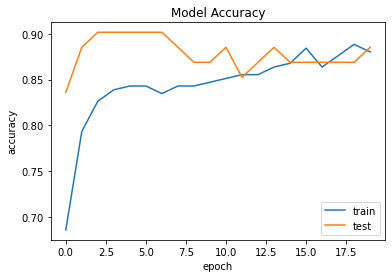

In [142]:
# Model accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

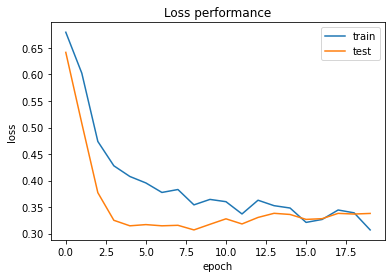

In [143]:
# loss perfomance
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Loss performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Results and metrics

The accuracy results we have been seeing are for the training data, but what about the testing dataset? If our model's cannot generalize to data that wasn't used to train them, they won't provide any utility.

Let's test the performance of both our categorical model and binary model. To do this, we will make predictions on the training dataset and calculate performance metrics using Sklearn.

### Base: rf_model acc=0.85

In [144]:
from sklearn.metrics import classification_report

In [145]:
print('Results for Random forest Model')
print(accuracy_score(y_test, y_pred_class_rf))
print(classification_report(y_test, y_pred_class_rf))

Results for Random forest Model
0.8524590163934426
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.85      0.82      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### NN Model_1 acc=0.90

In [146]:
# generate classification report using predictions for categorical model

categorical_pred = np.argmax(model_1.predict(X_test_norm), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.8852459016393442
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        33
           1       0.96      0.79      0.86        28

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



### NN model_2 acc=0.89

In [147]:
binary_pred = np.round(model_2.predict(X_test_norm)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

Results for Binary Model
0.8852459016393442
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        33
           1       0.96      0.79      0.86        28

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



### NN model_3 acc=0.89

In [148]:
model_3_pred = np.round(model_3.predict(X_test_norm)).astype(int)

print('Results for Binary Model_3')
print(accuracy_score(y_test, model_3_pred))
print(classification_report(y_test, model_3_pred))

Results for Binary Model_3
0.8852459016393442
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.92      0.82      0.87        28

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



## Summary of key findings

Comparing the results of the baseline model (random forest) and three different architectures of Neural Networks, the model 1 is best, is validation accuracy is 0.9, which is fine improvements (RF acc=0.85). 
Using these parameters:
- Dropout
- l2 regularizers (lr=0.001)
- activation ='softmax'
- loss function: categorical_crossentropy
- optimizer: rmsprop

However, it is difficult to interpret the neural network and lack of explainability comparing with Random forest algorithm.

## Insights, & Suggestions in revisiting such cases

1. As this dataset is pretty small (303 rows), I will try bigger, and similar datasets to demonstrate the final model, to evaluate those parameters.
2. I expect the binary model (model_2) will be better than model_1, which is not unfortunately. I rather try more tests with different penalties, regularizers, optimizers to prevent overfitting problem.
3. Some of attributes has lower correlationship, clustering techniques or PCA I may also try in revisiting, before tuning hyperparameters.

## Follow-up experiments

### feature engineering with pca

In [149]:
X_train.astype('float32').max()

564.0

In [151]:
x_train = X_train.astype('float32') / 564.
x_test = X_test.astype('float32') / 564.

In [152]:
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train_flat.shape)
print(x_test_flat.shape)

(242, 13)
(61, 13)


In [153]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler().fit(x_train_flat)
x_train_scaled = s.transform(x_train_flat)

In [154]:
from sklearn.decomposition import PCA

def data_pca(x_data, n_components):
    pca = PCA(n_components=n_components)

    fit_pca = pca.fit(x_data)
    
    print("Variance explained with {0} components:".format(n_components), 
          round(sum(fit_pca.explained_variance_ratio_), 2))

    return fit_pca, fit_pca.transform(x_data)

In [155]:
pca_full, data_full = data_pca(x_train_scaled, 13)

Variance explained with 13 components: 1.0


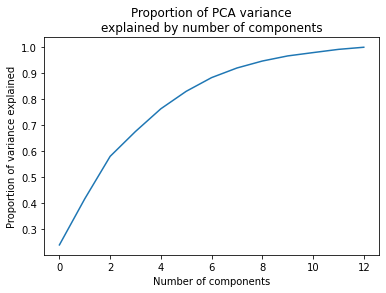

In [156]:
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.title("Proportion of PCA variance\nexplained by number of components")
plt.xlabel("Number of components")
plt.ylabel("Proportion of variance explained");

We need 10 (components) features can explain 95% of the variance in this data. 

In [159]:
data.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
166,52,1,3,138,223,0,0,169,0,0.0,1,0,3,0,0
25,50,0,3,120,219,0,0,158,0,1.6,2,0,3,0,0
37,57,1,4,150,276,0,2,112,1,0.6,2,1,6,1,1


In [167]:
abs(data.corr()['target']).sort_values(ascending=True)

fbs         0.025264
chol        0.085164
trestbps    0.150825
restecg     0.169202
age         0.223120
sex         0.276816
slope       0.339213
cp          0.414446
thalach     0.417167
oldpeak     0.424510
exang       0.431894
ca          0.460033
thal        0.512574
num         0.830081
target      1.000000
Name: target, dtype: float64

From all features, let's try pulling out 3 features with lowest correlations from EDA 5.2 Features correlations with target:
- trestbps(0.15)
- chol(0.05)
- fbs(0.02)

In [185]:
#select last 10 features and target as new data
data_pro = data[['age', 'sex', 'cp', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal','target']]

In [186]:
x = data_pro.iloc[:,:-1].values
y = data_pro.target.values

In [187]:
x_train,x_test, y_train, y_test = train_test_split(x,
                                                   y,stratify=y,
                                                   random_state=100,
                                                   test_size=0.2)

### Try RF

In [188]:
rf_model_pro = RandomForestClassifier(n_estimators=200)
rf_model_pro.fit(x_train,y_train)
y_pred = rf_model_pro.predict(x_test)
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred)))

accuracy is 0.770


Much lower than previous RF!

### Try Model_2's parameters (binary target)

In [189]:
#normalize data
x_train_norm = normalizer.fit_transform(x_train)
x_test_norm = normalizer.transform(x_test)

In [191]:
model_2_pro=Sequential()
model_2_pro.add(Dense(16,input_shape=(10,),kernel_initializer='normal', 
                  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_2_pro.add(Dropout(0.25))
model_2_pro.add(Dense(8,kernel_initializer='normal', 
                  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_2_pro.add(Dropout(0.25))
model_2_pro.add(Dense(1,activation='sigmoid'))
model_2_pro.compile(Adam(lr = .001),loss='binary_crossentropy',metrics=['accuracy'])

In [192]:
model_2_pro.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 16)                176       
                                                                 
 dropout_22 (Dropout)        (None, 16)                0         
                                                                 
 dense_34 (Dense)            (None, 8)                 136       
                                                                 
 dropout_23 (Dropout)        (None, 8)                 0         
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [193]:
history_2_pro = model_2_pro.fit(x_train_norm,y_train,
                            validation_data=(x_test_norm,y_test),
                            epochs=50,batch_size=10)

Epoch 1/50
25/25 [==============================] - 1s 8ms/step - loss: 0.6847 - accuracy: 0.6818 - val_loss: 0.6795 - val_accuracy: 0.7869
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.7893 - val_loss: 0.6517 - val_accuracy: 0.7869
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6123 - accuracy: 0.8388 - val_loss: 0.6055 - val_accuracy: 0.7869
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5496 - accuracy: 0.8512 - val_loss: 0.5476 - val_accuracy: 0.7869
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.4933 - accuracy: 0.8554 - val_loss: 0.4958 - val_accuracy: 0.7869
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4391 - accuracy: 0.8636 - val_loss: 0.4647 - val_accuracy: 0.7869
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4025 - accuracy: 0.8595 - val_loss: 0.4498 - val_accuracy: 0.7869
Epoch 8/50
25/25 [==

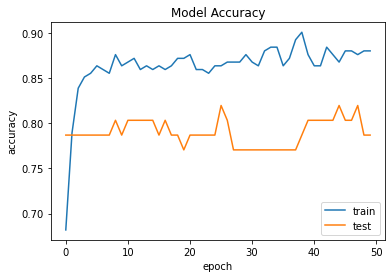

In [194]:
# Model accuracy
plt.plot(history_2_pro.history['accuracy'])
plt.plot(history_2_pro.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

### Conclusion:

- Val_accurary is even much lower than previous model_2. 
- Simpily removal of 3 lower correlatd features will not helpful for accuracy improvements.